<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [4]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


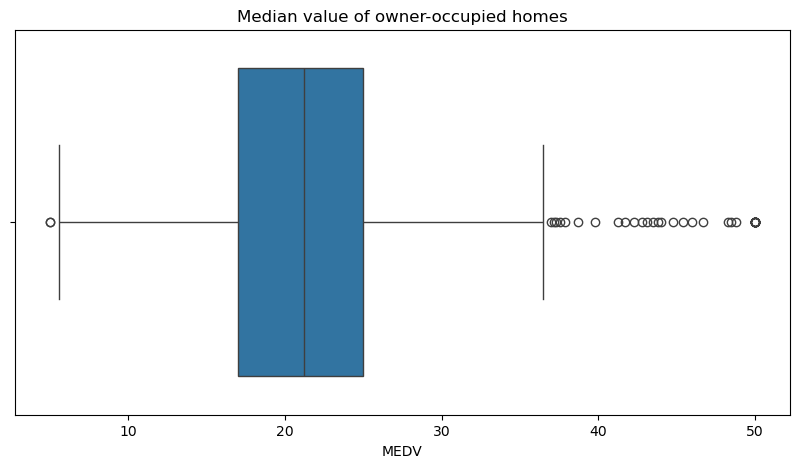

In [24]:
pyplot.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV)
pyplot.title("Median value of owner-occupied homes")
pyplot.show()

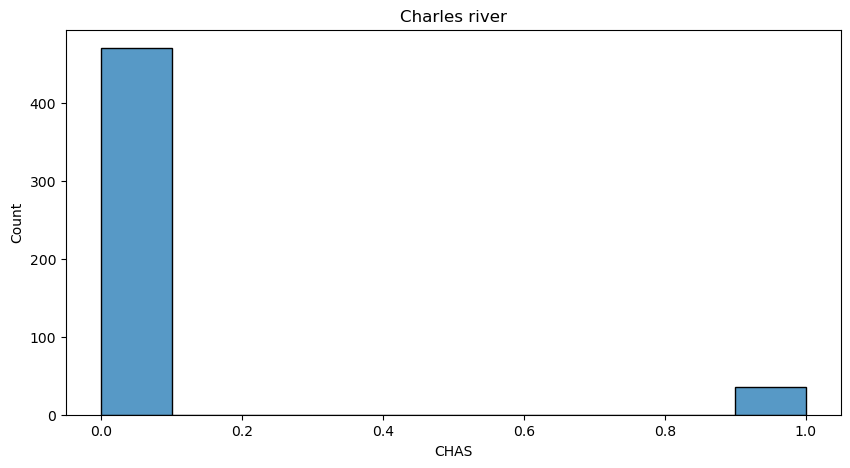

In [25]:
pyplot.figure(figsize=(10,5))
sns.histplot(data=boston_df, x='CHAS', bins=10, kde=False)
pyplot.title("Charles river")
pyplot.show()

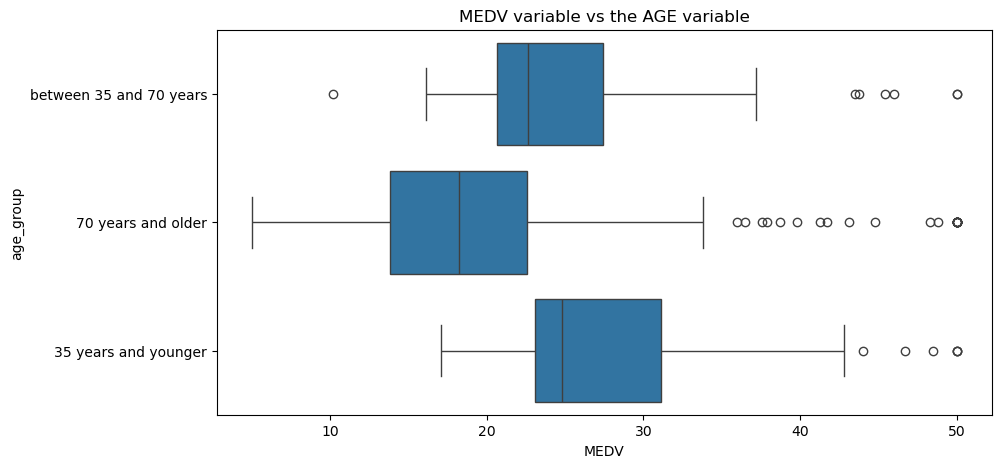

In [13]:
boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'

pyplot.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV, y=boston_df.age_group, data=boston_df)
pyplot.title("MEDV variable vs the AGE variable")
pyplot.show()

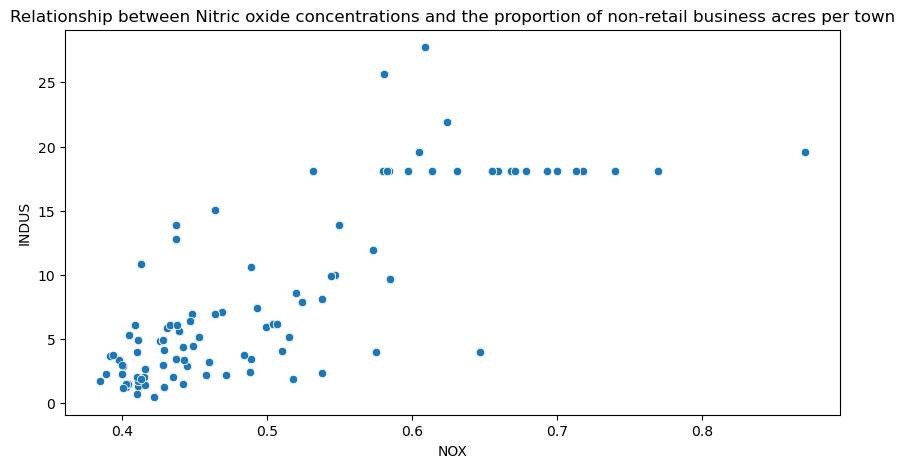

In [14]:
pyplot.figure(figsize=(10,5))
sns.scatterplot(x=boston_df.NOX, y=boston_df.INDUS, data=boston_df)
pyplot.title("Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
pyplot.show()

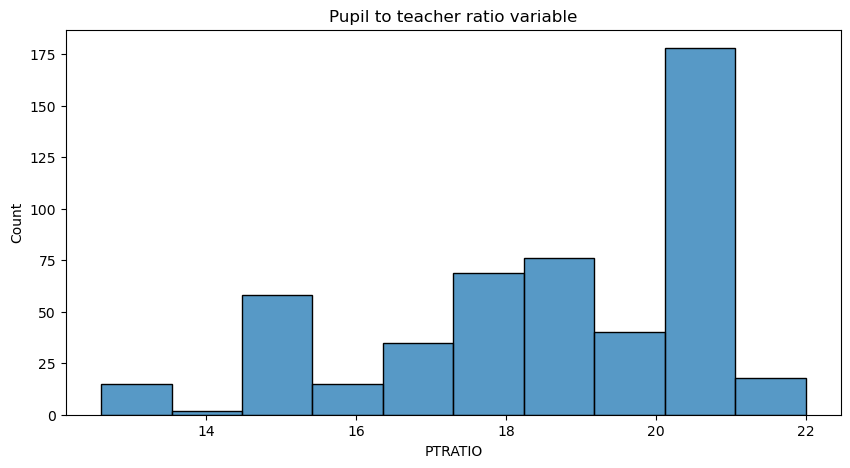

In [22]:
pyplot.figure(figsize=(10,5))

sns.histplot(data=boston_df, x='PTRATIO', bins=10, kde=False)
pyplot.title("Pupil to teacher ratio variable")
pyplot.show()

In [41]:
# H(0) = Both average MEDV are the same
# H(1) = Both average MEDV are NOT the same
# α = 0.05

boston_df['CHAS'].value_counts()
a = boston_df[boston_df['CHAS'] == 0]['MEDV']
b = boston_df[boston_df['CHAS'] == 1]['MEDV']
_, p_value = stats.ttest_ind(a,b,axis=0,equal_var=True)
print(f"P-value: {p_value}")
if p_value < 0.05:
    conclusion = "Reject the null hypothesis: There is a significant difference in median home values between houses near the Charles River and those that are not."
else:
    conclusion = "Fail to reject the null hypothesis: No significant difference in median home values between houses near the Charles River and those that are not."

print(conclusion)

P-value: 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference in median home values between houses near the Charles River and those that are not.


In [39]:
# H(0) = all three population means are the same 
# H(1) = At least one of the means differ
# α = 0.05
boston_df["AGE"].value_counts()

low = boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"]
mid = boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"]
high = boston_df[boston_df["age_group"] == '70 years and older']["MEDV"]

anova_result =  stats.f_oneway(
    low, 
    mid, 
    high
)
p_value = anova_result.pvalue
print(f"ANOVA p-value: {p_value}")
if p_value < 0.05:
    conclusion = "Reject the null hypothesis: There is a significant difference in median home values between houses near the Charles River and those that are not."
else:
    conclusion = "Fail to reject the null hypothesis: No significant difference in median home values between houses near the Charles River and those that are not."

print(conclusion)

ANOVA p-value: 1.7105011022702984e-15
Reject the null hypothesis: There is a significant difference in median home values between houses near the Charles River and those that are not.


In [40]:
# H(0) = There is no linear relationship between NOX and INDUS.
# H(1) = There is a linear relationship between NOX and INDUS.

_, p_value = stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])
print(f"Pearson correlation p-value: {p_value}")
if p_value < 0.05:
    conclusion = "Reject the null hypothesis: There is a significant linear relationship between NOX and INDUS."
else:
    conclusion = "Fail to reject the null hypothesis: No significant linear relationship between NOX and INDUS."

print(conclusion)

Pearson correlation p-value: 7.913361061239527e-98
Reject the null hypothesis: There is a significant linear relationship between NOX and INDUS.


In [42]:
# H(0) = There is no effect of weighted distance to employment centers (DIS) on median home value (MEDV).
# H(1) = There is an effect of weighted distance to employment centers (DIS) on median home value (MEDV).

# Regression: MEDV ~ DIS
X = sm.add_constant(boston_df["DIS"])  # adding constant
y = boston_df["MEDV"]

model = sm.OLS(y, X).fit()
print(model.summary())

p_value = model.pvalues["DIS"]
print(f"Regression p-value for DIS: {p_value}")
if p_value < 0.05:
    conclusion = "Reject the null hypothesis: There is a significant effect of weighted distance to employment centers on median home value."
else:
    conclusion = "Fail to reject the null hypothesis: No significant effect of weighted distance to employment centers on median home value."

print(conclusion)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        18:14:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0